In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat

data = loadmat("/content/drive/MyDrive/Colab Notebooks/HW/ML/Dataset/mini_mnist.mat")

print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'images', 'labels'])


In [ ]:
img = data['images']

label = data['labels'].flatten()

print(img.shape)
print(label.shape)

(28, 28, 1000)
(1000,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

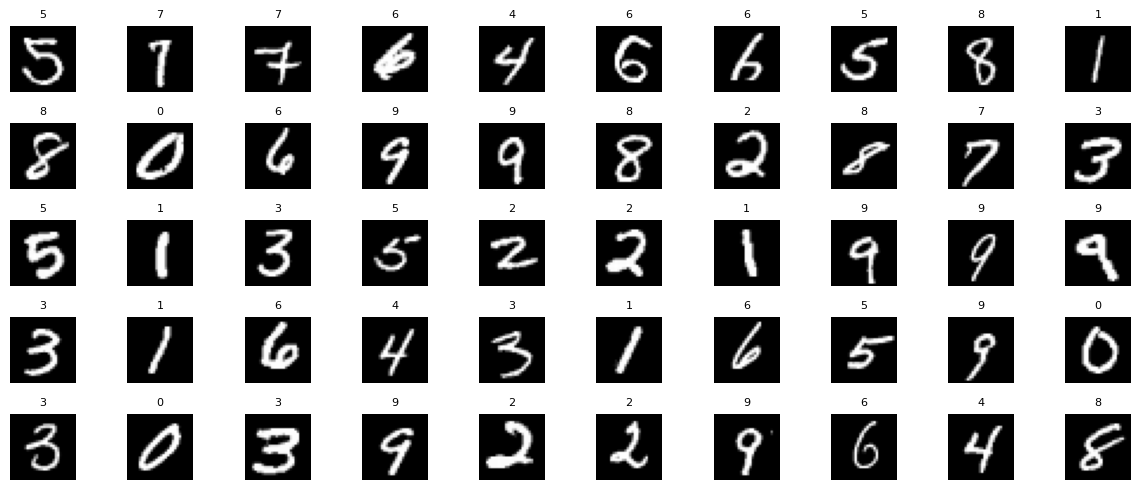

In [ ]:
np.random.seed(42)
random_indices = np.random.choice(img.shape[2], size=50, replace=False)
selected_images = img[:, :, random_indices]
selected_labels = label[random_indices]

fig, axes = plt.subplots(5, 10, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(selected_images[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(selected_labels[i]), fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

img = np.moveaxis(img, -1, 0)
img = img / 255.0

print("Shape of images (img):", img.shape)
print("Shape of labels (label):", label.shape)

X_train, X_test, y_train, y_test = train_test_split(img, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

def create_model(hidden_layers, hidden_neurons, learning_rate=1e-9):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for neurons in hidden_neurons:
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model1 = create_model(hidden_layers=1, hidden_neurons=[16])
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=0)
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)

model2 = create_model(hidden_layers=1, hidden_neurons=[128])
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)

model3 = create_model(hidden_layers=2, hidden_neurons=[64, 128])
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=0)
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)

results = {
    "Model": ["1 Hidden Layer (16 Neurons)", "1 Hidden Layer (128 Neurons)", "2 Hidden Layers (64, 128 Neurons)"],
    "Test Accuracy": [test_accuracy1, test_accuracy2, test_accuracy3]
}

results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)

Shape of images (img): (1000, 28, 28)
Shape of labels (label): (1000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,Model,Test Accuracy
0,1 Hidden Layer (16 Neurons),0.145
1,1 Hidden Layer (128 Neurons),0.100
2,"2 Hidden Layers (64, 128 Neurons)",0.085


In [ ]:
def normalize(data):
    data_min = np.min(data, axis=(1, 2), keepdims=True)
    data_max = np.max(data, axis=(1, 2), keepdims=True)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data

normalized_data = normalize(img)

print("Normalized Data Shape:", normalized_data.shape)

Normalized Data Shape: (1000, 28, 28)


In [ ]:
def standardize(data):
    mean = np.mean(data, axis=(1, 2), keepdims=True)
    std = np.std(data, axis=(1, 2), keepdims=True)
    standardized_data = (data - mean) / std
    return standardized_data

standardized_data = standardize(img)

print("Standardized Data Shape:", standardized_data.shape)

Standardized Data Shape: (1000, 28, 28)


In [ ]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_data, label, test_size=0.2, random_state=42)
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_train_norm, y_train_norm, test_size=0.15, random_state=42)

y_train_norm = to_categorical(y_train_norm, num_classes=10)
y_val_norm = to_categorical(y_val_norm, num_classes=10)
y_test_norm = to_categorical(y_test_norm, num_classes=10)

model1_norm = create_model(hidden_layers=1, hidden_neurons=[128])
history1_norm = model1_norm.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm, y_val_norm), batch_size=64, epochs=10, verbose=0)
test_loss_norm, test_accuracy_norm = model1_norm.evaluate(X_test_norm, y_test_norm, verbose=0)
print("Test Accuracy with Normalization:", test_accuracy_norm)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Accuracy with Normalization: 0.20499999821186066


In [ ]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(standardized_data, label, test_size=0.2, random_state=42)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_train_std, y_train_std, test_size=0.15, random_state=42)

y_train_std = to_categorical(y_train_std, num_classes=10)
y_val_std = to_categorical(y_val_std, num_classes=10)
y_test_std = to_categorical(y_test_std, num_classes=10)

model1_std = create_model(hidden_layers=1, hidden_neurons=[128])
history1_std = model1_std.fit(X_train_std, y_train_std, validation_data=(X_val_std, y_val_std), batch_size=64, epochs=10, verbose=0)
test_loss_std, test_accuracy_std = model1_std.evaluate(X_test_std, y_test_std, verbose=0)
print("Test Accuracy with Standardization:", test_accuracy_std)


Test Accuracy with Standardization: 0.41499999165534973
